# 1. Introducción teórica

Hablamos de **dependencia funcional**, cuando la relación o dependencia entre dos variables es “perfecta”, es decir, los puntos del diagrama de dispersión estarían situados sobre la función y = f(x).

En cambio, hablamos de **dependencia estocástica** cuando ésta es menos rigurosa, y la relación de dependencia se escribiría de la forma y = f(x) + E.

En dependencia estocástica se distinguen dos tipos de técnicas:

- *Análisis de regresión*: estudia si hay dependencia entre las variables, si es posible estimar los valores de y a partir de los de x y la precisión de dicha estimación.

- *Análisis de correlación*: estudia si hay dependencia estocástica entre las variables y el grado de dependencia.

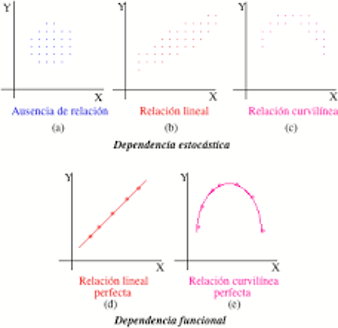

La **regresión lineal simple** es un modelo matemático usado para aproximar la relación de dependencia lineal (una línea recta) entre dos variables.

La **regresión lineal múltiple** es un modelo matemático usado para aproximar la relación de dependencia lineal entre más de dos variables.

Los problemas de regresión lineal se pueden abordar de muchas formas. Uno de los métodos más utilizados es el **método de los mínimos cuadrados (OLS)**, para el que la mejor recta será la que pase más cerca de todos los puntos (ie: minimice la distancia de los puentos observados a la recta de regresión).

**Coeficientes de regresión**: los valores obtenidos son *estimadores del modelo*, por lo que los valores pueden ser significativos o no, y hay que hacer un contraste de hipótesis para estudiar su significatividad (ie: si son o no 0).

Normalmente se asume un nivel de significación (alfa = 5%,1%..) y se compara con el pvalor que nos devuelva nuestro programa. Lo que nos interesa es que el pvalor sea lo más pequeño posible para rechazar Ho: b=0, y que así nuestro modelo sea válido. Tanto el pvalor como el estadístico t buscaremos que sean <alfa y rechazar H0.
Cuando tengamos varias variables, nos servirá para saber cuáles son significativas para nuestro modelo y cuáles no (las que quitaríamos del modelo)

El modelo tendrá una parte determinista (lo que hemos podido explicar) y una parte estocástica (error o residuo). Esta última parte es aleatoria y no debería seguir ningún patrón, de hecho debería seguir una distribución normal. Si no es así, probablemente el modelo escogido no sea el más acertado. La recta debe cumplir:

- *Independencia* : los residuos deben ser independientes entre sí
- *Homocedasticidad*: (igualdad de varianzas)
- *Normalidad*: los residuos tienen distribución normal de media cero. 

La **multicolinealidad** es un problema común en regresión lineal múltiple, y hace referencia a la correlación entre las variables predictoras del modelo. Cuando hay correlación entre ellas, se va a incrementar la variabilidad de los coeficintes, haciçendolos inestables. Es habitual eliminar variables predictoras en este caso.

# 2. Regresión Lineal Simple

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
produccion =  {"tn_tomates":     [30,28,32,25,25,25,22,24,35,40],
               "precio_ketchup": [26,30,25,40,42,40,50,45,26,20]}

data = pd.DataFrame(produccion, columns= ["tn_tomates","precio_ketchup"])
data.T



,0,1,2,3,4,5,6,7,8,9
tn_tomates,30,28,32,25,25,25,22,24,35,40
precio_ketchup,26,30,25,40,42,40,50,45,26,20


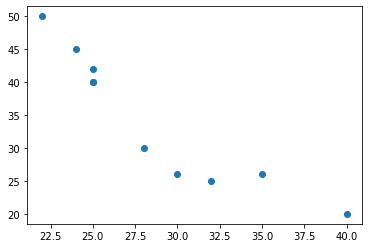

In [3]:
tn_tomates =  [30,28,32,25,25,25,22,24,35,40]
precio_ketchup = [26,30,25,40,42,40,50,45,26,20]

plt.scatter(tn_tomates,precio_ketchup)

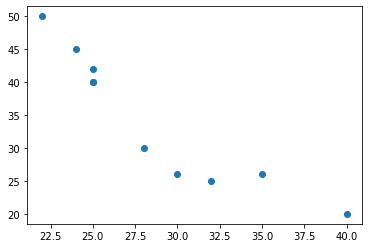

In [4]:
plt.scatter(data.tn_tomates,data["precio_ketchup"])

In [5]:
#Coeficiente de correlación de Pearson
Correlacion = np.corrcoef(tn_tomates, precio_ketchup)
Correlacion

array([[ 1.       , -0.9225553],
       [-0.9225553,  1.       ]])

In [7]:
# Instanciamos y creamos el modelo con statsmodels, 

data = pd.DataFrame(produccion, columns= ["tn_tomates","precio_ketchup"])

import statsmodels.formula.api as smf
lm = smf.ols(formula="precio_ketchup~tn_tomates",  data = data).fit()



In [8]:
lm.params

Intercept     81.841886
tn_tomates    -1.658807
dtype: float64

In [9]:
lm.summary()

C:\Users\sergi\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         precio_ketchup   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     45.73
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           0.000143
Time:                        19:25:48   Log-Likelihood:                -27.343
No. Observations:                  10   AIC:                             58.69
Df Residuals:                       8   BIC:                             59.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.8419      7.138     11.465      0.000      65.381      98.302
tn_tomates    -1.6588      0.245     -6.762      0.000      -2.224      -1.093
==============================================================================
Omnibus:                        1.501   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                0.887
Skew:                          -0.389   Prob(JB):                        0.642
Kurtosis:                       1.766   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

In [10]:
# A nuestro dataframe le añadimos la columna harina_pred, utilizando nuestro modelo
data["precio_ketchup_pred"] = lm.params[0] + lm.params[1]*data["tn_tomates"]
data

,tn_tomates,precio_ketchup,precio_ketchup_pred
0,30,26,32.077670
1,28,30,35.395284
2,32,25,28.760055
3,25,40,40.371706
4,25,42,40.371706
5,25,40,40.371706
6,22,50,45.348128
7,24,45,42.030513
8,35,26,23.783634
9,40,20,15.489598


In [11]:
# Instanciamos y creamos el modelo con scikit-learn, y vemos que obtenemos los mismos parámetros

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

model = linear_model.LinearRegression()


results = model.fit(np.array(tn_tomates).reshape(-1, 1),precio_ketchup)
print('alfa = ' + str(model.intercept_) + ', beta = ' + str(model.coef_))

alfa = 81.84188626907071, beta = [-1.65880721]


In [12]:
# Para ver la eficacia de nuestro modelo, imprimimos el coeficiente de determinación R2 obtenido con las
# scikit-learn y statsmodel

lm.rsquared, model.score(np.array(tn_tomates).reshape(-1,1), precio_ketchup)

(0.8511082907754198, 0.8511082907754197)

In [13]:
#Coeficientes de determinación, hacemos el calculo a mano y comprobamos que obtenemos el mismo resultado
numerador = sum((data["precio_ketchup_pred"]-np.mean(data["precio_ketchup"]))**2)
denominador= sum((data["precio_ketchup"]-np.mean(data["precio_ketchup"]))**2)

R_cuad = numerador/denominador

R_cuadrado_adj = 1 - ((10-1)/(10-1-1))*(1-R_cuad)

print("El coeficiente de determinación que he calculado: ", R_cuad)
print("El coeficiente de determinación ajustado es", R_cuadrado_adj)


El coeficiente de determinación que he calculado:  0.8511082907754178
El coeficiente de determinación ajustado es 0.8324968271223451


In [14]:
Correlacion

array([[ 1.       , -0.9225553],
       [-0.9225553,  1.       ]])

In [15]:
# Comprobamos que el coeficiente de determinación coincide con con coeficiente de correlación al cuadrado:

print("El coeficiente correlación de Pearson es ", Correlacion[0][1], " su cuadrado es ",(Correlacion[0][1]**2))
print("Debe coincidir con el coeficiente de determinación R2                         ",R_cuad )

El coeficiente correlación de Pearson es  -0.9225553049955434  su cuadrado es  0.85110829077542
Debe coincidir con el coeficiente de determinación R2                          0.8511082907754178


In [18]:
from sklearn import metrics
from sklearn.metrics import make_scorer, mean_squared_error
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          np.sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

In [19]:
MAE = metricas['MAE'](data.precio_ketchup, data.precio_ketchup_pred)
RMSE = metricas['RMSE'](data.precio_ketchup, data.precio_ketchup_pred)
MAPE = metricas['MAPE'](data.precio_ketchup, data.precio_ketchup_pred)
R2 = metricas['R2'](data.precio_ketchup, data.precio_ketchup_pred)

print('MAE:  %.4f' % MAE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  3.1953
RMSE: 3.7259
MAPE: 10.9115
R2:   0.8511


In [ ]:
# Ejercicio: dividir los datos en conjuntos train/test y evaluar las métricas

# 3. Regresión Lineal Múltiple

In [20]:
import os
ruta = os.path.join("datasets/","Advertising.csv")
fichero = open(ruta)
data = pd.read_csv(ruta)
fichero.close()


**Modelo RL: Simple que predice las ventas según el gasto en publicidad en TV**

In [21]:
import statsmodels.formula.api as smf
lm =smf.ols(formula="Sales~TV", data=data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [22]:
# Los valores de lm.params son valores estimados, y tienen un pvalor asociado a ellos. Si ese pvalor es pequeño podríamos 
# aceptar que el parámetro no es cero --> tiene significación estadística y lo mantendremos en el modelo. Si el valor es
# muy grande podremos rechazar el que no sea cero y no aportará mucha información a nuestro modelo
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [23]:
print("El coeficiente de determinación R2 es:                   ", lm.rsquared)
print("El coeficiente de determinación ajustado R2 ajustado es: ", lm.rsquared_adj)

El coeficiente de determinación R2 es:                    0.611875050850071
El coeficiente de determinación ajustado R2 ajustado es:  0.6099148238341623


In [ ]:
lm.summary()

In [ ]:
# Utilizamos el modelo para predecir:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))

data["sales_pred"] =7.032594 + 0.047537*data["TV"]

data["RSE"] = (data["Sales"]-data["sales_pred"])**2
SSD = data["RSE"].sum()
# Calculamos la desviación típica de los residuos
RSE = np.sqrt(SSD/(len(data)-2))
RSE

sales_mean = np.mean(data["Sales"])

error = RSE/sales_mean
error

# Hay un 23% del modelo que no queda explicado

**Modelo que predice las ventas según gasto en TV y periódico**

In [ ]:
lm2 =smf.ols(formula="Sales~TV+Newspaper", data=data).fit()
lm2.params

In [ ]:
# El modelo será y = 5.774948 + 0.046901*TV +  0.044219*Newspaper
lm2.pvalues

In [ ]:
print("El coeficiente de determinación R2 es:                   ", lm2.rsquared)
print("El coeficiente de determinación ajustado R2 ajustado es: ", lm2.rsquared_adj)
# Hay una mejora pero es pequeña

In [ ]:
# Utilizamos el modelo para predecir:
sales_pred2 = lm2.predict(pd.DataFrame(data[["TV","Newspaper"]]))

data["sales_pred2"] =5.774948 + 0.046901*data["TV"] +  0.044219*data["Newspaper"]

data["RSE2"] = (data["Sales"]-data["sales_pred2"])**2
SSD2 = data["RSE2"].sum()


# Calculamos la desviación típica de los residuos
# Usamos número de vbles predictoras-1, luego -2-1=-3
RSE2 = np.sqrt(SSD2/(len(data)-3))

sales_mean = np.mean(data["Sales"])

error = RSE2/sales_mean

print("El SSD2 es: ", SSD2)
print("El RSE2 es: ", RSE2)
print("El error es: ", error)


# Hay un 22% del modelo que no queda explicado. La diferencia con el caso anterior (únicamente la TV) no es muy grande

In [ ]:
lm2.summary()

El F es muy alto y el pvalor muy bajo. El modelo predice mejor, pero la mejora es tan pequeña y R2 y R2 ajustado crecen tan poco que no merece la pena meter la vble predictora en el modelo

**Modelo que predice las ventas según gasto en TV y Radio**

In [ ]:
lm3 =smf.ols(formula="Sales~TV+Radio", data=data).fit()
lm3.params

In [ ]:
lm3.pvalues

In [ ]:
print("El coeficiente de determinación R2 es:                   ", lm3.rsquared)
print("El coeficiente de determinación ajustado R2 ajustado es: ", lm3.rsquared_adj)

In [ ]:
# La mejora es considerable
# R2 y R2 ajustado se acercan casi al 90%

# Utilizamos el modelo para predecir:
sales_pred3 = lm3.predict(pd.DataFrame(data[["TV","Radio"]]))

data["sales_pred3"] =2.921100 + 0.045755*data["TV"] +  0.187994*data["Radio"]

data["RSE3"] = (data["Sales"]-data["sales_pred3"])**2
SSD3 = data["RSE3"].sum()


# Calculamos la desviación típica de los residuos
# Usamos número de vbles predictoras-1, luego -2-1=-3
RSE3 = np.sqrt(SSD3/(len(data)-3))

sales_mean = np.mean(data["Sales"])

error3 = RSE3/sales_mean

print("El SSD3 es: ", SSD3)
print("El RSE3 es: ", RSE3)
print("El error 3 es: ", error3)

El RSE ha bajado casi a la mitad, y el modelo ahora no explica el 12%.

Clara mejoría --> incluir la vble Radio en el modelo.

**Modelo que predice las ventas según gasto en TV, periódico y Radio**

In [ ]:
lm4 =smf.ols(formula="Sales~TV+Newspaper+Radio", data=data).fit()
lm4.params

In [ ]:
lm4.pvalues

In [ ]:
print("El coeficiente de determinación R2 es:                   ", lm4.rsquared)
print("El coeficiente de determinación ajustado R2 ajustado es: ", lm4.rsquared_adj)

In [ ]:
# Utilizamos el modelo para predecir:
sales_pred4 = lm4.predict(pd.DataFrame(data[["TV","Radio","Newspaper"]]))

data["sales_pred4"] = 2.938889 + 0.045765*data["TV"] -0.001037*data["Newspaper"] + 0.188530*data["Radio"]

data["RSE4"] = (data["Sales"]-data["sales_pred4"])**2
SSD4 = data["RSE4"].sum()


# Calculamos la desviación típica de los residuos
# Usamos número de vbles predictoras-1, luego -2-1=-3
RSE4 = np.sqrt(SSD4/(len(data)-3-1))

sales_mean = np.mean(data["Sales"])

error4 = RSE4/sales_mean

print("El SSD4 es: ", SSD4)
print("El RSE4 es: ", RSE4)
print("El error 4 es: ", error4)

**Multicolinealidad**

Tenemos que escribir la vble que nos da problemas como función de las otras variables predictoras.

Se calcula a partir del Factor de Inflacción de la varianza VIF = 1/(1-R2) -> Se calcula para todas y cada una de las varianzas.
- VIF = 1 --> las vbles no tienen correlación
- VIF < 1 --> correlación moderada, las vbles pueden permanecer en el modelo
- VIF > 1 --> correlación alta, alguna vble fuera del modelo

In [ ]:
# En este caso sería Newspaper ~ TV + Radio

lm_newsp =smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
r_squared_newsp =lm_newsp.rsquared
VIF_news = 1/(1-r_squared_newsp)
print("El R2 para el Newspaper es: ", r_squared_newsp, "y el VIF es: ", VIF_news)

In [ ]:
# En este caso sería TV ~ Newspaper + Radio

lm_tv =smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
r_squared_tv =lm_tv.rsquared
VIF_tv = 1/(1-r_squared_tv)
print("El R2 para TV: ", r_squared_tv, "y el VIF es: ", VIF_tv)

In [ ]:
# En este caso sería Radio ~ TV + Newspaper

lm_radio =smf.ols(formula="Radio~TV+Newspaper", data=data).fit()
r_squared_radio =lm_radio.rsquared
VIF_radio = 1/(1-r_squared_radio)
print("El R2 para Radio es: ", r_squared_radio, "y el VIF es: ", VIF_radio)